
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL FITTED WITH THE WHOLE DATA SET: A STATISTICAL CLASSICAL APPROACH
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     54.44
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           2.94e-07
Time:                        19:38:23   Log-Likelihood:                -66.896
No. Observations:                  23   AIC:                             137.8
Df Residuals:                      21   BIC:                             140.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
  

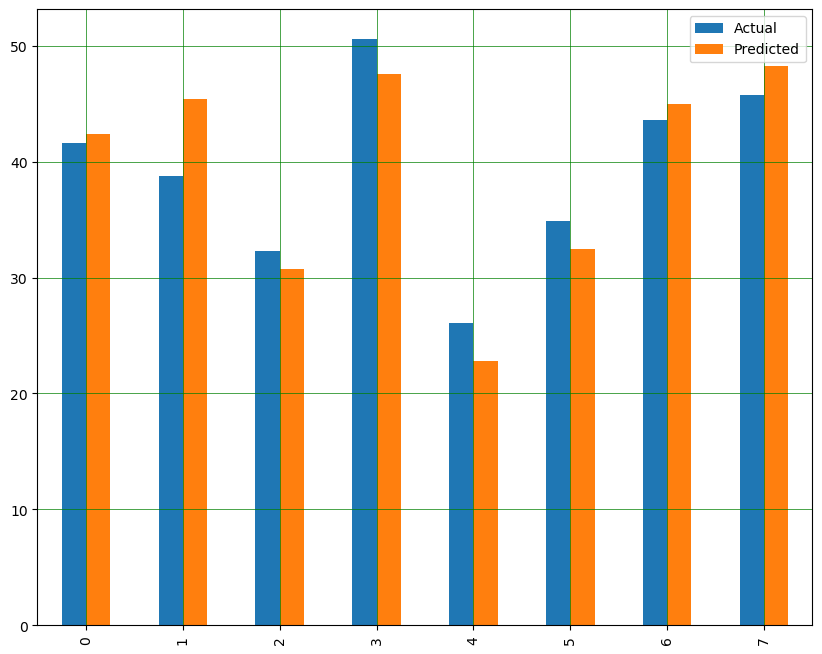

DEVIATIONS BAR-CHART
----------------------------------------------------------------

----------------------------------------------------------------
MODEL PERFORMANCE EVALUATED IN THE TEST SET WITH SKLEARN
----------------------------------------------------------------
Mean Absolute Error: 2.707119398615748
Mean Squared Error: 10.169506285780734
Root Mean Squared Error: 3.1889663350027284
r2 Variance score: 0.8133384743775011
----------------------------------------------------------------



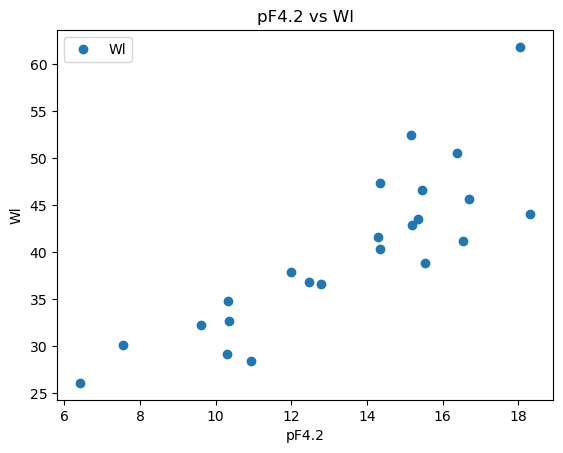

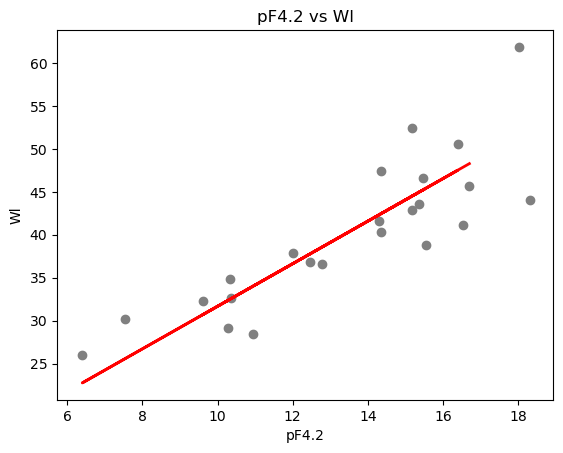

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
COMPARISION WITH OTHER REGRESSION MODELS
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

................................................................
----------------------------------------------------------------
WITHOUT CROSS-VALIDATION
----------------------------------------------------------------
................................................................

----------------------------------------------------------------
SKLEARN LINEAR REGRESSION MODEL RESULTS
RMSE=  4.435207187349006
MAE=  3.398182222605192
----------------------------------------------------------------

----------------------------------------------------------------
SKLEARN DECISSION TREE REGRESSION MODEL RESULTS
RMSE=  1.0394657908920255
MAE=  0.30652173913043496
----------------------------------------------------------------

----------------------------------------------------------------
SKLEARN RANDOM FORES

,Wl,Wp,pF2.5,pF4.2,N40,N200,F,IP,GRAVEL,SAND,SILT,IG,ACTAR,N4,ZWl,ZWp,ZpF2.5,ZpF4.2,ZF,ZIP
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,2.300000e+01,2.300000e+01,23.000000,2.300000e+01,2.300000e+01,2.300000e+01
mean,40.080000,22.126087,24.801304,13.407826,82.220870,73.240000,87.586522,17.953913,7.413043,19.557391,73.442174,13.000000,0.252174,95.865217,4.347826e-07,8.695652e-07,0.000000,1.930823e-17,8.695652e-07,-8.695652e-07
std,8.595206,3.149557,2.366500,3.248320,16.903632,21.774056,14.291766,7.847759,8.695518,16.891063,21.638094,10.501082,0.108165,6.437293,1.000000e+00,1.000000e+00,0.999999,9.999994e-01,1.000001e+00,1.000001e+00
min,26.070000,17.310000,17.980000,6.400000,46.320000,24.490000,41.990000,1.430000,0.000000,1.370000,24.490000,0.000000,0.100000,79.200000,-1.629980e+00,-1.529130e+00,-2.882440,-2.157370e+00,-3.190410e+00,-2.105560e+00
25%,33.755000,19.030000,23.570000,10.645000,71.785000,63.340000,86.500000,14.300000,0.315000,6.900000,62.740000,3.500000,0.200000,95.250000,-7.358750e-01,-9.830200e-01,-0.520305,-8.505400e-01,-7.602000e-02,-4.656000e-01
50%,40.330000,22.830000,24.250000,14.340000,85.030000,75.090000,91.140000,17.930000,3.410000,16.600000,76.990000,14.000000,0.200000,99.200000,2.909000e-02,2.235000e-01,-0.232960,2.869700e-01,2.486400e-01,-3.050000e-03
75%,44.875000,24.770000,26.275000,15.500000,96.780000,91.460000,96.675000,23.250000,12.815000,22.445000,90.635000,20.000000,0.300000,99.900000,5.578700e-01,8.394550e-01,0.622730,6.440750e-01,6.359250e-01,6.748550e-01
max,61.850000,27.010000,28.990000,18.320000,99.580000,98.610000,99.310000,36.140000,33.570000,67.200000,98.610000,42.000000,0.500000,100.000000,2.532810e+00,1.550670e+00,1.770000,1.512220e+00,8.203000e-01,2.317360e+00


In [2]:
#IMPORT MAIN LIBRARIES
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

#IMPORT DATA
dataset = pd.read_csv(r"atterberg_ML2.csv",sep=',')


#SELECT MODEL'S CHARACTERISTICS
#Z MEANS PREVIOUSLY NORMALIZED CHARACTERISTICS WITH SPSS SOFTWARE
X = dataset[['pF4.2']].values
y = dataset['Wl'].values
zX= dataset[['ZpF4.2']].values
zy= dataset['ZWl'].values

#FIRST, WE FIT A LINEAR MODEL WITH THE WHOLE DATA SET
#WE ARE GOING TO FIT THE MODEL TWICE TO COMPARE RESULTS 
#FIRST TIME WITH STATSMODEL LIBRARY
#SECOND TIME WITH SKLEARN LIBRARY
print()
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("MODEL FITTED WITH THE WHOLE DATA SET: A STATISTICAL CLASSICAL APPROACH")
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

#OSL REGRESSION FROM STATSMODEL API IS SELECTED
Xt = sm.add_constant(X)
estt = sm.OLS(y,Xt)
estt2 = estt.fit()

#OSL REGRESSION SUMMARY
print(estt2.summary())


#for attr in dir(estt2):
    #if not attr.startswith('_'):
       # print(attr)

#OSL REGRESSION MODEL COEFFICIENTS, ADJUSTMENT AND P.VALES
#A shorter code is possible to perform the same task,
#but this way is more clear to understand 
X0=estt2.params[0]          # Model Constant
X1=estt2.params[1]          # Model Coefficient X1 
#X2=estt2.params[2]          # Model Coefficient X2
X0_bse=estt2.bse[0]         # Model Constant std error
X1_bse=estt2.bse[1]         # Model Coefficient X1 std error 
#X2_bse=estt2.bse[2]         # Model Coefficient X2 std error 
p_values0=estt2.pvalues[0]  # Model Constant p.value
p_values1=estt2.pvalues[1]  # Model Coefficient X1 p.value
#p_values2=estt2.pvalues[2]  # Model Coefficient X2 p.value
r2=estt2.rsquared           # Model adjustment in terms of R2
f_pvalue=estt2.f_pvalue     # p.value of R2
alpha=0.05                  # Significance level of this study
warning_1=0                 # This is a flag to evaluate model adjustment p.value later
warning_2=0                 # This is a flag to evaluate coefficients model p.values later



#OSL REGRESSION MODEL EQUATION
print("----------------------------------------------------------------")
print("MODEL EQUATION")
print("----------------------------------------------------------------")
print("Equation: Wp = {:.2f} ± {:.2f} + {:.2f}(pF4.2) ± {:.2f}".format(X0,X0_bse,X1,X1_bse))
print("R2= ",r2)
print("Prob (F-statistic)= ",f_pvalue)
print("Model parameters P>|t|= ",estt2.pvalues)
print("Alpha= ",alpha)

#This part of the code evaluates if R2 and model parameters have the required statistical significance
print("----------------------------------------------------------------")
print("EXPLAINED A.I. SUGGESTIONS ABOUT THIS MODEL")
print("----------------------------------------------------------------")

if f_pvalue>alpha:
    warning_1=1
    print("WARNING: Model adjustment has not the required statistical significance")
else:
    print("Model adjustment has the required statistical significance")
    
for n in estt2.pvalues:
    if n>alpha:
        warning_2=1
        print("WARNING: Model parameters has not the required statistical significance")
        break
        
if warning_2==0:
    print("Model parameters has the required statistical significance")
    
if warning_2==0 and warning_1==0:
    print("ACCEPT THIS MODEL")
else:
    print("REJECT THIS MODEL")

print("|r| Pearson's Correlation Coefficient =", np.sqrt(abs(r2)))

print("----------------------------------------------------------------")

#THE SAME LINEAR REGRESSION MODEL WITH SKLEARN
regressorT = LinearRegression()  
regressorT.fit(X, y)
y_predT = regressorT.predict(X)

#LET'S SHOW THE METRICS OF THE LINEAR REGRESSION MODEL WITH SKLEARN
print()
print("----------------------------------------------------------------")
print("MODEL PERFORMANCE EVALUATED WITH SKLEARN")
print("----------------------------------------------------------------")
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_predT))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_predT))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_predT)))
print('r2 Variance score:', metrics.r2_score(y, y_predT))
print()


#NOW, WE REPEAT THE PROCESS, BUT THIS TIME
#WE SPLIT THE DATASET INTO A TRAINING SET AND A TEST SET
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("LINEAR MODEL REGRESSION")
print("DATASET SPLITTED INTO A TEST SET AND A TRAINING SET 78-32%")
print("CROSS-VALIDATION")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

#Divide data 78-32%  for training set and test set.
#Note that random_state is set to 0: the code will always use the same random selected data
#in each run for training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=0)


#This code fits the model with Stats model OSL, using the TRAINING SET DATA and it displays a summary
print("----------------------------------------------------------------")
print("REGRESSION MODEL IN THE TRAINING SET")
print("----------------------------------------------------------------")
print("MODEL PERFORMANCE IN THE TRAINING SET WITH OSL LINEAL REGRESSION")
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train,X2)
est2 = est.fit()
print(est2.summary())


#Let's show a bar chart about model performance in the test set 
#It is based on SKlearn regression 
print()
print("----------------------------------------------------------------")
print("MODEL PERFORMANCE EVALUATED IN THE TEST SET")
print("----------------------------------------------------------------")

#COMPUTE PREDICTIONS OF THE LINEAR MODEL WITH THE TEST SET DATA
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

#DEVIATIONS BAR-CHART
coeff_df = pd.DataFrame(regressor.coef_)  
coeff_df
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print("DEVIATIONS BAR-CHART")
print("----------------------------------------------------------------")
print()

#MODEL PERFORMANCE EVALUATED IN THE TEST SET WITH SKLEARN
print("----------------------------------------------------------------")
print("MODEL PERFORMANCE EVALUATED IN THE TEST SET WITH SKLEARN")
print("----------------------------------------------------------------")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 Variance score:', metrics.r2_score(y_test, y_pred))
print("----------------------------------------------------------------")
print()

#DEVIATIONS 3D SCATTER PLOT
dataset.plot(x='pF4.2', y='Wl', style='o')  
plt.title('pF4.2 vs Wl')  
plt.xlabel('pF4.2')  
plt.ylabel('Wl')  
plt.show()

plt.scatter(X_train, y_train,  color='gray')
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('pF4.2 vs Wl')  
plt.xlabel('pF4.2')  
plt.ylabel('Wl')
plt.show()



#COMPARISON WITH OTHER REGRESSION MODELS
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("COMPARISION WITH OTHER REGRESSION MODELS")
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("................................................................")
print("----------------------------------------------------------------")
print("WITHOUT CROSS-VALIDATION")
print("----------------------------------------------------------------")
print("................................................................")
print()

#LINEAR REGRESSION MODEL WITOUT CROSS VALIDATION
print("----------------------------------------------------------------")
print("SKLEARN LINEAR REGRESSION MODEL RESULTS")
from sklearn.linear_model import LinearRegression
#lin_reg = LinearRegression(random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE= ",lin_rmse)
lin_mae = mean_absolute_error(y, lin_predictions)
print("MAE= ",lin_mae)
print("----------------------------------------------------------------")
print()

#DECISSION TREE REGRESSION MODEL WITOUT CROSS VALIDATION
print("----------------------------------------------------------------")
print("SKLEARN DECISSION TREE REGRESSION MODEL RESULTS")
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)
tree_predictions = tree_reg.predict(X)
tree_mse = mean_squared_error(y, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
print("RMSE= ",tree_rmse)
tree_mae = mean_absolute_error(y, tree_predictions)
print("MAE= ",tree_mae)
print("----------------------------------------------------------------")
print()

#RANDOM FOREST REGRESSION MODEL WITOUT CROSS VALIDATION
print("----------------------------------------------------------------")
print("SKLEARN RANDOM FOREST REGRESSION MODEL RESULTS")
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg.fit(X, y)
forest_predictions = forest_reg.predict(zX)
forest_mse = mean_squared_error(y, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE= ",forest_rmse)
forest_mae = mean_absolute_error(y, forest_predictions)
print("MAE= ",forest_mae)
print()
print("----------------------------------------------------------------")

#SVM REGRESSION MODEL WITOUT CROSS VALIDATION
print("----------------------------------------------------------------")
print("SKLEARN SUPPORT VECTOR MACHINES REGRESSION MODEL RESULTS")
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")
svm_reg.fit(X, y)
svm_predictions = svm_reg.predict(X)
svm_mse = mean_squared_error(y, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
print("RMSE= ",svm_rmse)
svm_mae = mean_absolute_error(y, svm_predictions)
print("MAE= ",svm_mae)
print("----------------------------------------------------------------")
print()


#DOUBLE CROSS VALIDATION OF THE MODELS
# K-FOLDED CROSS-VALIDATION IS SELECTED FOR ALL THE COMPARED MODELS
# K=10
print("................................................................")
print("----------------------------------------------------------------")
print("RESULTS COMPARED WITH K-FOLDS CROSS-VALIDATION:")
print("A MACHINE LEARNING DOUBLE CROSS VALIDATION APPROACH")
print("K= 10")
print("----------------------------------------------------------------")
print("................................................................")
print()

#THIS FUNCTION WILL SHOW THE SCORES OF EACH REGRESSION MODEL WITH DOUBLE CROSS VALIDATION METHOD
def display_scores(scores):
    print("Scores:", scores) # THIS IS AN ARRAY WITH THE RMSE OF EACH FOLD OF THE CROSS VALIDATION PROCESS
    print("Mean:", scores.mean()) #THIS IS THE MEAN OF THE RMSE ACHIEVED IN EACH FOLD
    print("Standard deviation:", scores.std())   #THIS IS THE STANDARD DEVIATION OF THE DOUBLE CROSS VALIDATED MODEL
    print()
    
print()
from sklearn.model_selection import cross_val_score

print("----------------------------------------------------------------")
print("LINEAR REGRESSION DOUBLE CROSS VALIDATION RESULTS")
print("----------------------------------------------------------------")
lin_scores = cross_val_score(lin_reg, X, y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
print()
print()

print("----------------------------------------------------------------")
print("DECISION TREE REGRESSION DOUBLE CROSS VALIDATION RESULTS")
print("----------------------------------------------------------------")
tree_scores = cross_val_score(tree_reg, X, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)
print()
print()

print("----------------------------------------------------------------")
print("RANDOM FOREST REGRESSION DOUBLE CROSS VALIDATION RESULTS")
print("----------------------------------------------------------------")
forest_scores = cross_val_score(forest_reg, X, y,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)
print()
print()

print("----------------------------------------------------------------")
print("SVM REGRESSION DOUBLE CROSS VALIDATION RESULTS")
print("----------------------------------------------------------------")
svm_scores = cross_val_score(svm_reg, X, y,scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)
print()
print()

#Show data statistics
dataset.describe()
